In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
df = pd.read_csv('synth_temp.csv')

In [0]:
df.head()

,AverageTemperature,Year
0,12.980258,1841
1,13.689697,1842
2,12.485703,1843
3,14.202069,1844
4,12.831530,1845


In [0]:
df = df.loc[df.Year > 1901]
df.head()

,AverageTemperature,Year
366,16.973653,1902
367,17.181773,1903
368,17.436933,1904
369,17.688948,1905
370,17.811166,1906


In [0]:
df_group_year = df.groupby('Year').agg(np.mean)
print(df_group_year.head())
print(df_group_year.tail())

      AverageTemperature
Year                    
1902           17.438122
1903           17.375456
1904           17.558674
1905           17.740646
1906           17.501770
      AverageTemperature
Year                    
2006           19.827744
2007           19.694244
2008           19.793876
2009           19.884571
2010           19.903760


In [0]:
window = 10
rolling = df_group_year.AverageTemperature.rolling(window).mean()
print(rolling.head(14))
print(rolling.tail())

Year
1902          NaN
1903          NaN
1904          NaN
1905          NaN
1906          NaN
1907          NaN
1908          NaN
1909          NaN
1910          NaN
1911    17.501145
1912    17.502700
1913    17.500737
1914    17.487112
1915    17.466333
Name: AverageTemperature, dtype: float64
Year
2006    19.548792
2007    19.591266
2008    19.631821
2009    19.671825
2010    19.710821
Name: AverageTemperature, dtype: float64


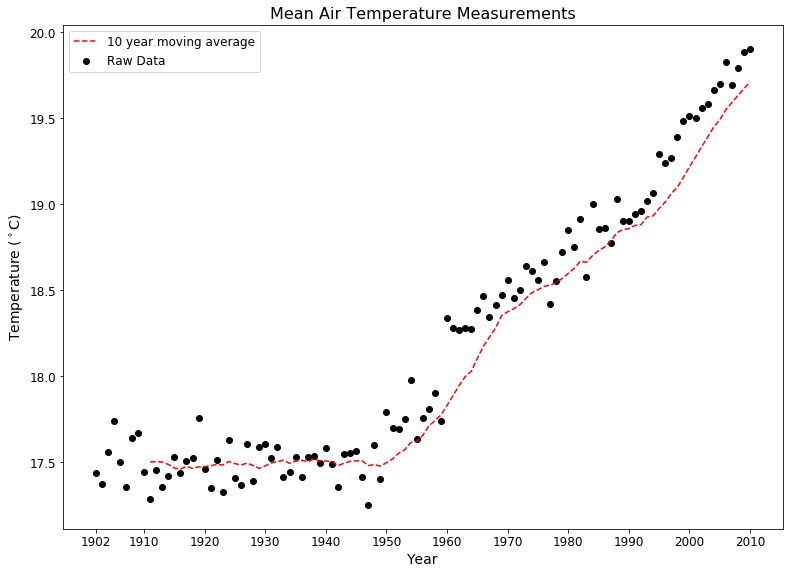

In [0]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
ax.scatter(df_group_year.index, 
           df_group_year.AverageTemperature, 
           label = 'Raw Data', c = 'k')
#
# Moving averages
#
ax.plot(df_group_year.index, 
        rolling, 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} year moving average')
#
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
#
# make the ticks include the first and last years
#
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
              fontsize = 14)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
